<a href="https://colab.research.google.com/github/safirimontano/Ci-ncia_De_Dados/blob/main/Regress%C3%A3o%20Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- determinal qual será a base

2- imput das bases

3 - import das bibliotecas

4 - Analise exploratória dos dados

5 - Normalização / padronização dos dados

6 - One-Hot Encoding

7 - Dividir base em dois - teste e treino

8 - Cálcular métricas (R², MAE, MSE, RMSE, MAPE (%))


In [ ]:
# 1 - Importação da base de dados do Kaggle
import kagglehub
import os

path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

os.listdir(path)

# 1.1 - Import das bibliotecas que serão usadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

Using Colab cache for faster access to the 'california-housing-prices' dataset.
Path to dataset files: /kaggle/input/california-housing-prices


In [ ]:
# 2- Carregando o dataset
df = pd.read_csv(os.path.join(path, 'housing.csv'))

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# 3 - EDA > Analise exploratória dos dados

print("Informações da base de dados:")
print(df.info())
print("\estatistica:")
print(df.describe())

Informações da base de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
\estatistica:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-3027494784.py:5: SyntaxWarning: invalid escape sequence '\e'
  print("\estatistica:")


In [ ]:
# 4 - One Hot Encoder

df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['ocean_proximity']))

df_final = pd.concat([df.drop('ocean_proximity', axis=1), encoded_df], axis=1)

df_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


Dissionário de colunas dos dados:

| Variável             | Descrição                 | Papel                       |
| -------------------- | ------------------------- | --------------------------- |
| `median_income`      | renda média da vizinhança | Preditora |
| `housing_median_age` | idade média das casas     | Preditora                   |
| `total_rooms`        | número total de cômodos   | Preditora                   |
| `population`         | número de habitantes      | Preditora                   |
| `ocean_proximity`    | distância do oceano       | Preditora                   |
| `median_house_value` | preço médio da casa       | **Target**               |


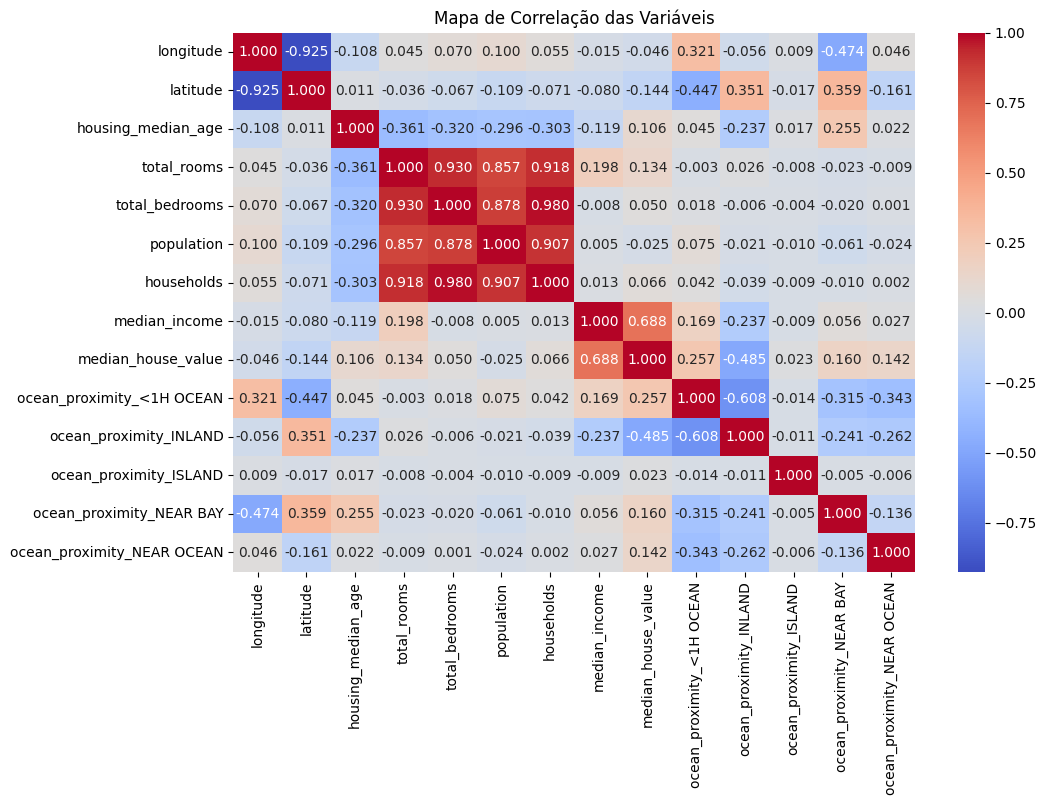

In [ ]:
# 5 - Heatmap para validar correlação
plt.figure(figsize=(11, 7))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm',fmt=".3f")
plt.title("Mapa de Correlação das Variáveis")
plt.show()


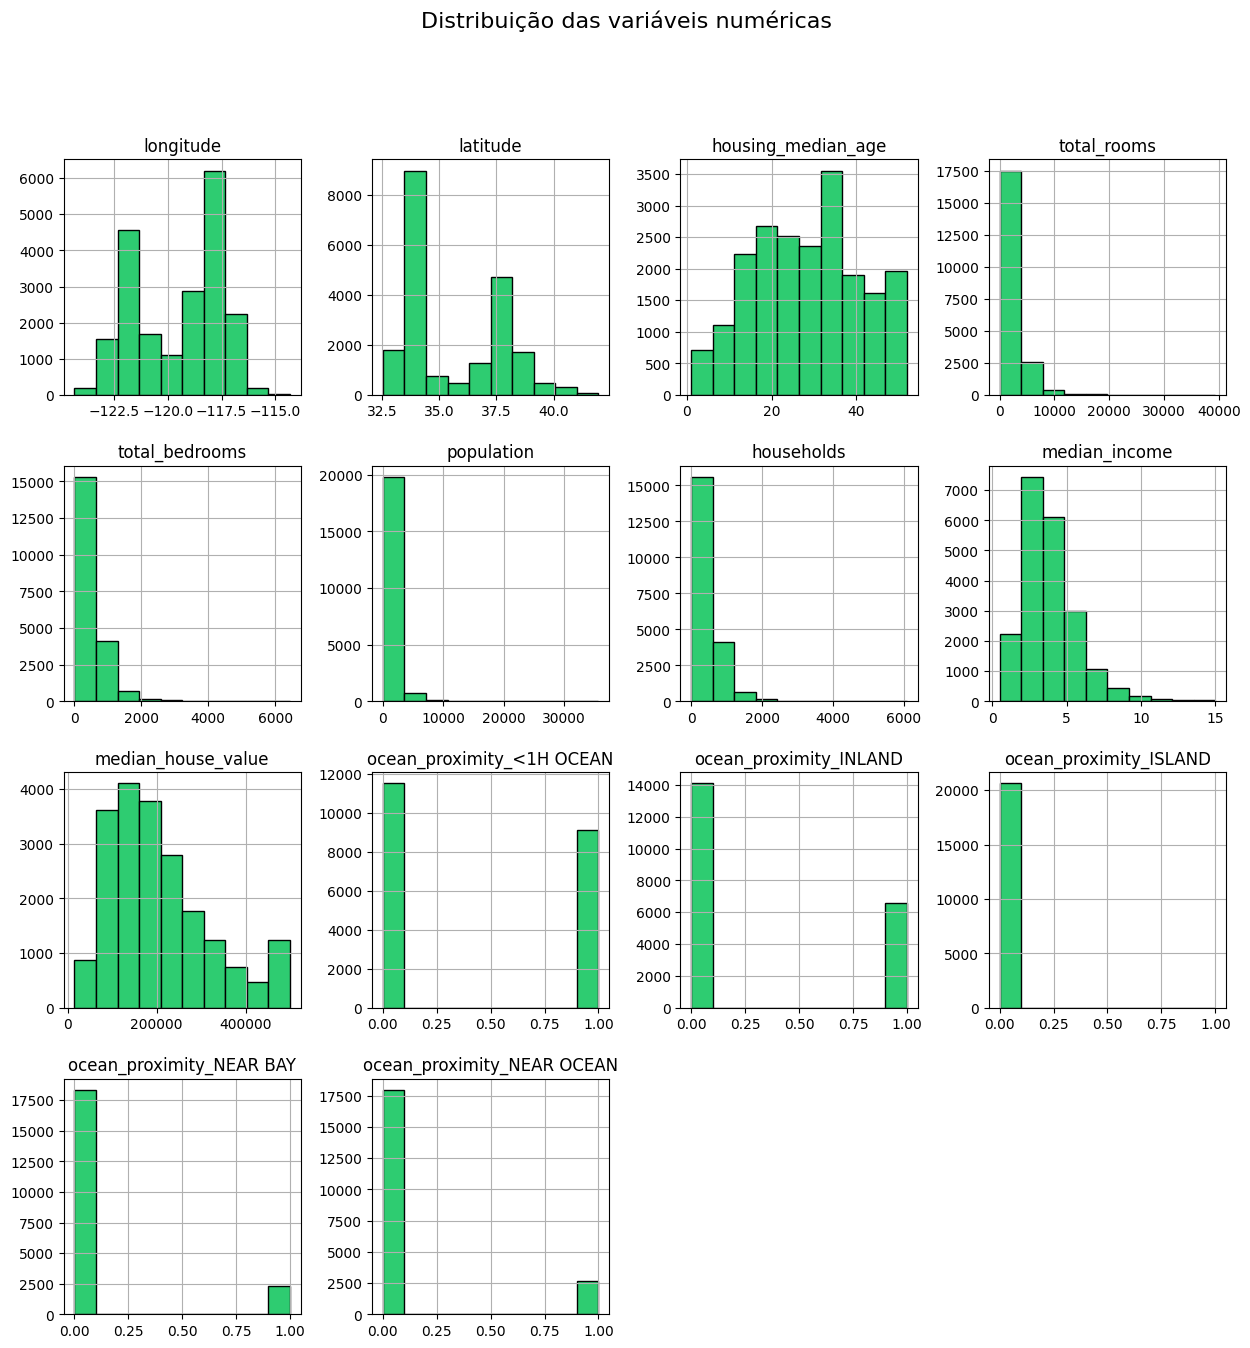

In [ ]:
#6 - Apresentação gráfica dos dados

df_final.hist(figsize=(15, 15), color='#2ecc71', edgecolor='black')
plt.suptitle('Distribuição das variáveis numéricas', fontsize=16)
plt.show()

In [ ]:
# 7 - Determinação do target (Variável alvo)

df['target'] = df_final['median_house_value']

Correlação das variáveis com a variável-alvo 'target':


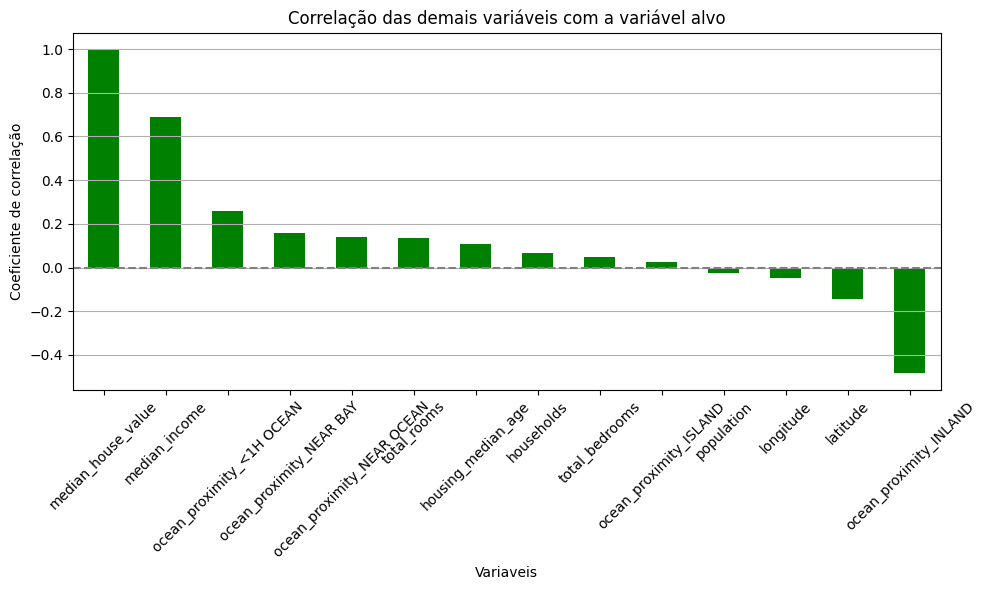

In [ ]:
# 8 - Apresentação da correlação dos dados com o target em tabela

correlacoes = df_final.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)

legenda = []
for var, corre in correlacoes.items():
    if abs(corre) >= 0.6:
        nivel = "muito forte"
    elif abs(corre) >= 0.4:
        nivel = "forte"
    elif abs(corre) >= 0.2:
        nivel = "moderada"
    elif abs(corre) >= 0.1:
        nivel = "fraca"
    else:
        nivel = "muito fraca ou nenhuma"

    direcao = "positiva" if corre > 0 else "negativa"
    legenda.append(f"Correlação {nivel} {direcao}")

tabela_correlacao = pd.DataFrame({
    'Variável': correlacoes.index,
    'Correlação com target': correlacoes.values,
    'Interpretação': legenda
})

print("Correlação das variáveis com a variável-alvo 'target':")
tabela_correlacao.style.background_gradient(
    subset=['Correlação com target'],
    cmap='Greens',
    axis=None
).format({'Correlação com target': '{:.3f}'})

#Visão gráfica da legenda

plt.figure(figsize=(10, 6))
correlacoes.plot(kind='bar', color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Correlação das demais variáveis com a variável alvo")
plt.ylabel("Coeficiente de correlação")
plt.xlabel("Variaveis")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# 9 - Determinando a variável preditora

X = df[['median_income']]
y = df['target']

In [ ]:
# 10 - Divisão entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 11 - Criação e treinamento
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 12 - Previsão
y_pred = modelo.predict(X_test)

In [ ]:
#10 - Avaliação

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMétricas do Modelo de Regressão Linear:")
print(f"MAE  (Erro absoluto médio): {mae:.2f}")
print(f"MSE  (Erro quadrático médio): {mse:.2f}")
print(f"RMSE (Raiz do erro quadrático): {rmse:.2f}")
print(f"R²   (Coeficiente de determinação): {r2:.2f}")


Métricas do Modelo de Regressão Linear:
MAE  (Erro absoluto médio): 62990.87
MSE  (Erro quadrático médio): 7091157771.77
RMSE (Raiz do erro quadrático): 84209.01
R²   (Coeficiente de determinação): 0.46


In [ ]:
# 11 - Resultados teste e previsão

result = pd.DataFrame({
    'median_income': X_test['median_income'].values,
    'target_teste': y_test.values,
    'target_previsto': y_pred
})

# Arredonda todas as colunas numéricas para 2 casas decimais
result = result.round(2)

print("\nResultados Reais vs Previstos:")
print(result.head(15))



Resultados Reais vs Previstos:
    median_income  target_teste  target_previsto
0            1.68       47700.0        114958.92
1            2.53       45800.0        150606.88
2            3.48      500001.0        190393.72
3            5.74      218600.0        285059.38
4            3.72      278000.0        200663.32
5            4.71      158700.0        242165.25
6            5.08      198200.0        257647.23
7            3.69      157500.0        199229.18
8            4.80      340000.0        245893.17
9            8.11      446600.0        384677.44
10           2.54      123200.0        151042.99
11           3.00      253900.0        170261.28
12           2.86      215100.0        164365.38
13           3.34      220500.0        184556.53
14           5.37      219800.0        269510.31


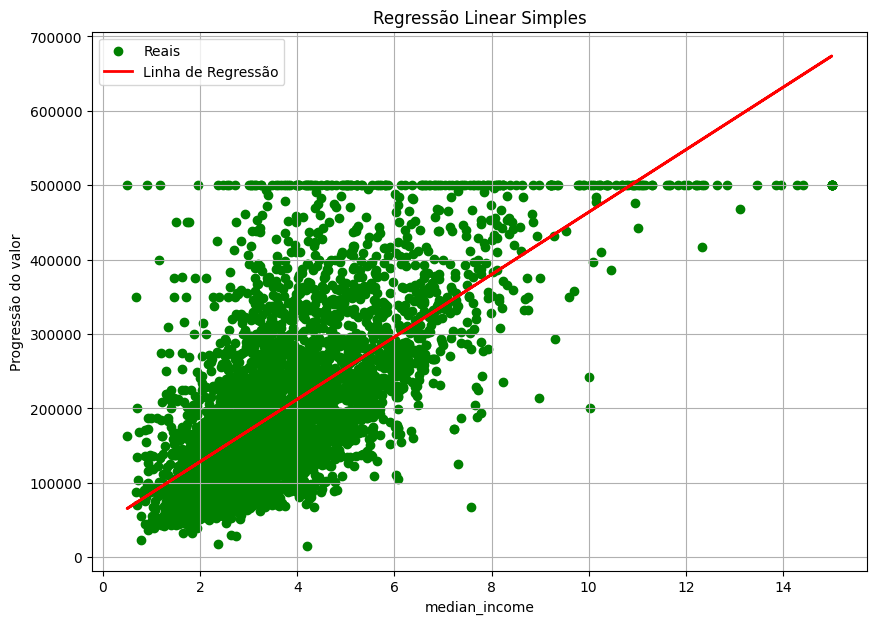

In [ ]:
# 12. Visualização da regressão

plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_test, color='green', label='Reais')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('median_income')
plt.ylabel('Progressão do valor')
plt.title('Regressão Linear Simples')
plt.legend()
plt.grid(True)
plt.show()